## Importing Libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Metrics to evaluate de model

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score

# For tuning the model

from sklearn.model_selection import GridSearchCV

# To ignore warnings

import warnings
warnings.filterwarnings("ignore")

## Loading dataset

In [2]:
df = pd.read_csv('/Users/franciscajara/Dropbox/Coding/predicting-flight-delay/dataset-SCL.csv')

In [3]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [6]:
df.nunique()

Fecha-I      53252
Vlo-I          750
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          866
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

In [7]:
#I want to check if I can safely drop this column considering the variance
df['AÑO'].value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

In [8]:
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

## EDA

### Summary statistics of some categorical variables

In [9]:
cols = ["TIPOVUELO", "OPERA", "SIGLADES"]

for column in cols:
    print("Unique values in", column, "are:")
    print(df[column].value_counts(normalize = True))
    print("*" * 50)

Unique values in TIPOVUELO are:
N    0.541976
I    0.458024
Name: TIPOVUELO, dtype: float64
**************************************************
Unique values in OPERA are:
Grupo LATAM                 0.599537
Sky Airline                 0.209630
Aerolineas Argentinas       0.028575
Copa Air                    0.027124
Latin American Wings        0.024543
Avianca                     0.016890
JetSmart SPA                0.016054
Gol Trans                   0.011817
American Airlines           0.011099
Air Canada                  0.008284
Iberia                      0.005307
Delta Air                   0.005249
Air France                  0.005249
Aeromexico                  0.005146
United Airlines             0.004912
Oceanair Linhas Aereas      0.004091
Alitalia                    0.003797
K.L.M.                      0.003680
British Airways             0.003006
Qantas Airways              0.002859
Lacsa                       0.001349
Austral                     0.001085
Plus Ultra Line

## Feature engineering

### Creating additional columns: high_season, min_diff, delay_15, period_day

In [10]:
# First, transforming date from string to datetime type.

df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d')

In [11]:
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

#### 1) high_season

In [12]:
# Creating this new column to identify if flights happen during high season periods.

df['high_season'] = np.where( (df['Fecha-I'].dt.month == 12) & (df['Fecha-I'].dt.day >= 12) | (df['Fecha-I'].dt.month <= 2) | (df['Fecha-I'].dt.month <= 3) & (df['Fecha-I'].dt.day <= 3) |  (df['Fecha-I'].dt.month == 7) & (df['Fecha-I'].dt.day >= 15) | (df['Fecha-I'].dt.month == 9) & (df['Fecha-I'].dt.day >= 11) , 1, 0)

In [13]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1


#### 2) min_diff

In [14]:
# Difference in minutes between 'Fecha-O' and 'Fecha-I' to check delay

df['min_diff'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60


In [15]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0


#### 3) delay_15

In [16]:
# Creating this new column considering if the delay is over 15 minutes or not.

df['delay_15'] = np.where(df['min_diff'] > 15, 1, 0)

In [17]:
# (Selecting this row just to check that is working)
df.iloc[9]

Fecha-I        2017-01-11 23:30:00
Vlo-I                          226
Ori-I                         SCEL
Des-I                         KMIA
Emp-I                          AAL
Fecha-O        2017-01-12 00:39:00
Vlo-O                          226
Ori-O                         SCEL
Des-O                         KMIA
Emp-O                          AAL
DIA                             12
MES                              1
AÑO                           2017
DIANOM                      Jueves
TIPOVUELO                        I
OPERA            American Airlines
SIGLAORI                  Santiago
SIGLADES                     Miami
high_season                      1
min_diff                      69.0
delay_15                         1
Name: 9, dtype: object

In [18]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,delay_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0


#### 4) period_day

In [19]:
# Creating this columns to identify in what period of the day the flight is scheduled.

start_morning_time = pd.to_datetime('05:00:00').time()
end_morning_time = pd.to_datetime('11:59:00').time()

start_afternoon_time = pd.to_datetime('12:00:00').time()
end_afternoon_time = pd.to_datetime('18:59:00').time()

period_day = []

for time in df['Fecha-I']:
    if start_morning_time <= time.time() <= end_morning_time:
        period_day.append('Morning')
    elif start_afternoon_time <= time.time() <= end_afternoon_time:
        period_day.append('Afternoon')
    else:
        period_day.append('Night')

df['period-day'] = period_day


In [20]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,delay_15,period-day
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,Night
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,Night
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,Night
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,Night
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,Night


## Visualizing behaviour of the delay rate across destination, airline, month of the year, day of the week, season and type of flight.

### WHAT'S THE STORYLINE I WANT TO SHOW HERE?

In [21]:
# Getting the delay rate

df.delay_15.value_counts(normalize=True)

0    0.81506
1    0.18494
Name: delay_15, dtype: float64

In [22]:
# Now the delay rate in porcentage

df.delay_15.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    81.5%
1    18.5%
Name: delay_15, dtype: object

## Crosstabs

In [23]:
pd.crosstab(df['OPERA'], df['SIGLADES'])

SIGLADES,Antofagasta,Arica,Asuncion,Atlanta,Auckland N.Z.,Balmaceda,Bariloche,Bogota,Buenos Aires,Calama,...,"San Juan, Arg.",Santa Cruz,Sao Paulo,Sydney,Temuco,Toronto,Tucuman,Ushuia,Valdivia,Washington
OPERA,,,,,,,,,,,,,,,,,,,,,
Aerolineas Argentinas,0,0,0,0,0,0,0,0,1949,0,...,0,0,0,0,0,0,0,0,0,0
Aeromexico,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Air Canada,0,0,0,0,0,0,0,0,282,0,...,0,0,0,0,0,283,0,0,0,0
Air France,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alitalia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
American Airlines,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austral,0,0,0,0,0,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,0
Avianca,0,0,0,0,0,0,0,885,0,0,...,0,0,0,0,0,0,0,0,0,0
British Airways,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
pd.crosstab(df['SIGLADES'], df['delay_15'], normalize = 'index')

delay_15,0,1
SIGLADES,,
Antofagasta,0.853612,0.146388
Arica,0.864532,0.135468
Asuncion,0.715517,0.284483
Atlanta,0.941341,0.058659
Auckland N.Z.,0.626039,0.373961
...,...,...
Toronto,0.685512,0.314488
Tucuman,0.736842,0.263158
Ushuia,0.333333,0.666667


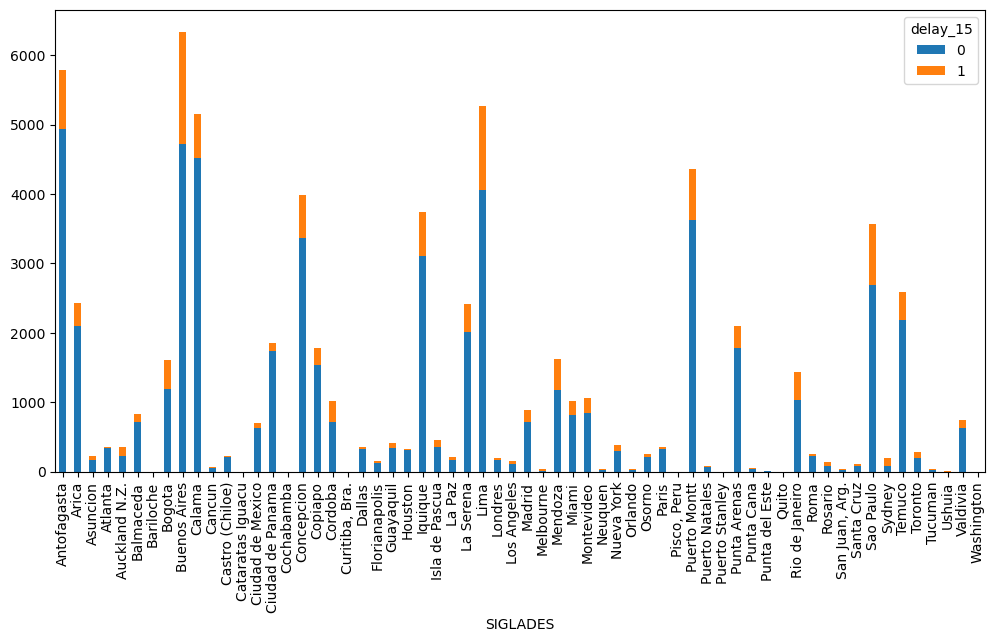

In [25]:
pd.crosstab(df['SIGLADES'], df['delay_15']).plot(kind = 'bar', stacked = True, figsize=(12,6))

plt.show()

In [26]:
pd.crosstab(df['OPERA'], df['delay_15'], normalize = 'index')

delay_15,0,1
OPERA,,
Aerolineas Argentinas,0.759877,0.240123
Aeromexico,0.971510,0.028490
Air Canada,0.543363,0.456637
Air France,0.916201,0.083799
Alitalia,0.888031,0.111969
American Airlines,0.932629,0.067371
Austral,0.797297,0.202703
Avianca,0.734375,0.265625
British Airways,0.858537,0.141463


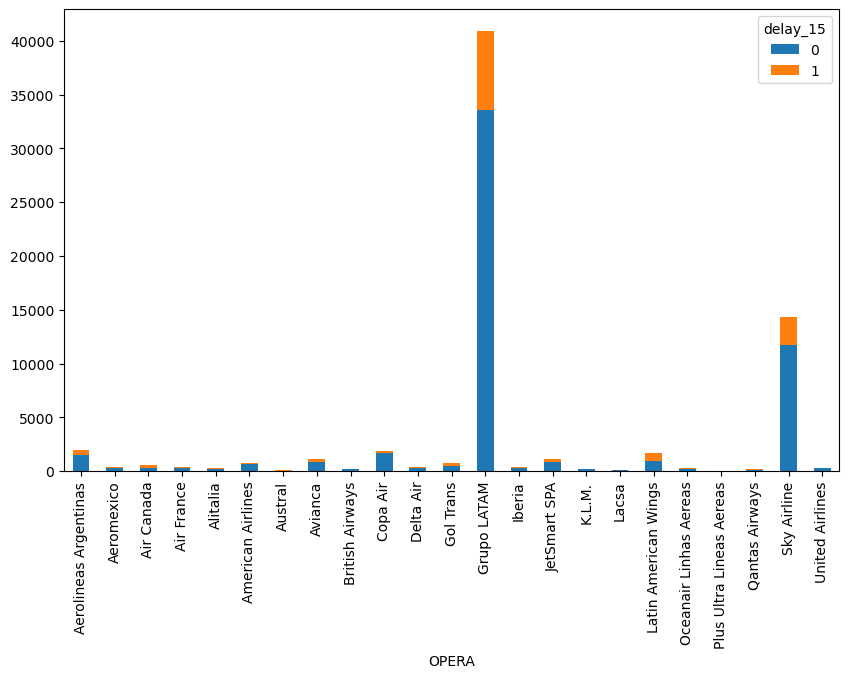

In [27]:
pd.crosstab(df['OPERA'], df['delay_15']).plot(kind = 'bar', stacked = True, figsize=(10,6))

plt.show()

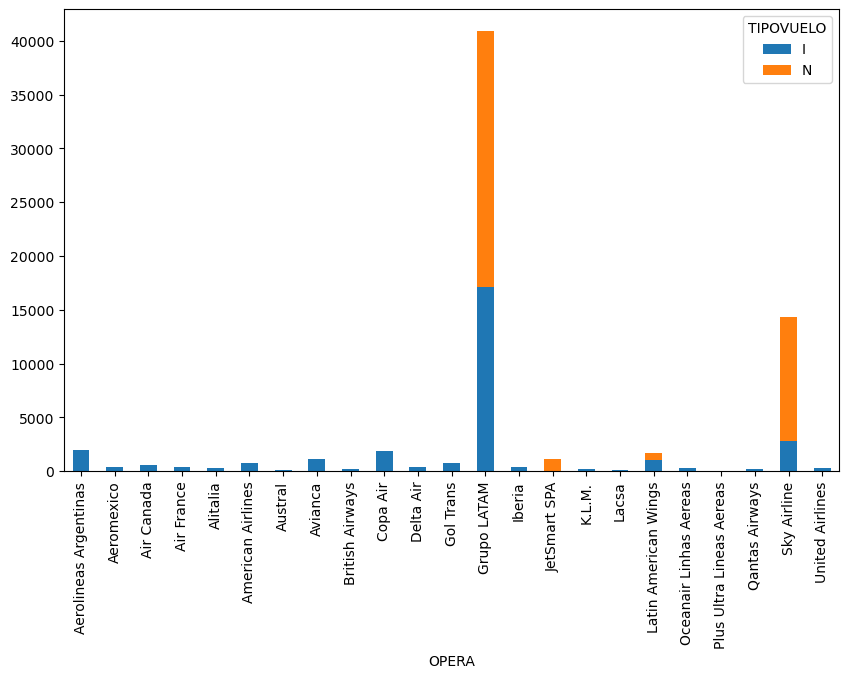

In [28]:
pd.crosstab(df['OPERA'], df['TIPOVUELO']).plot(kind = 'bar', stacked = True, figsize=(10,6))

plt.show()

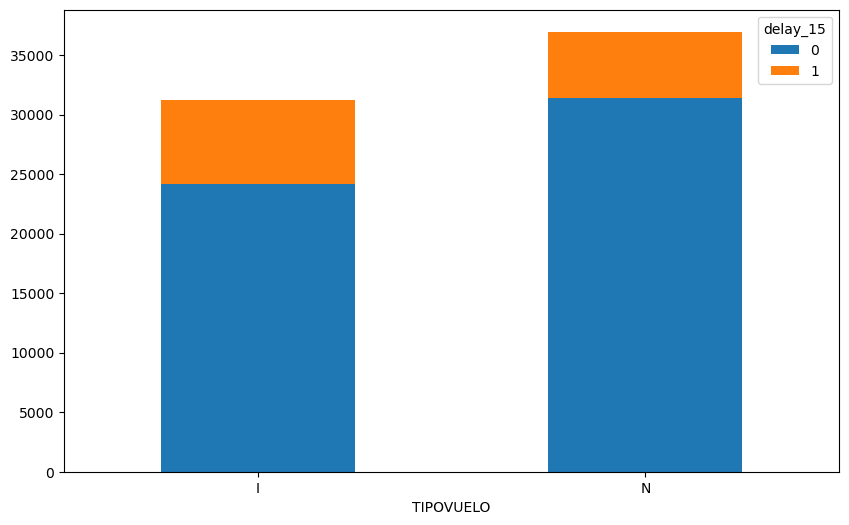

In [29]:
pd.crosstab(df['TIPOVUELO'], df['delay_15']).plot(kind = 'bar', stacked = True, figsize=(10,6), rot = 0)

plt.show()

## Barplots

### Barplot 1: shows the distribution of the flights considering delays, throughout the months of the year, and the type of flight (N or I).

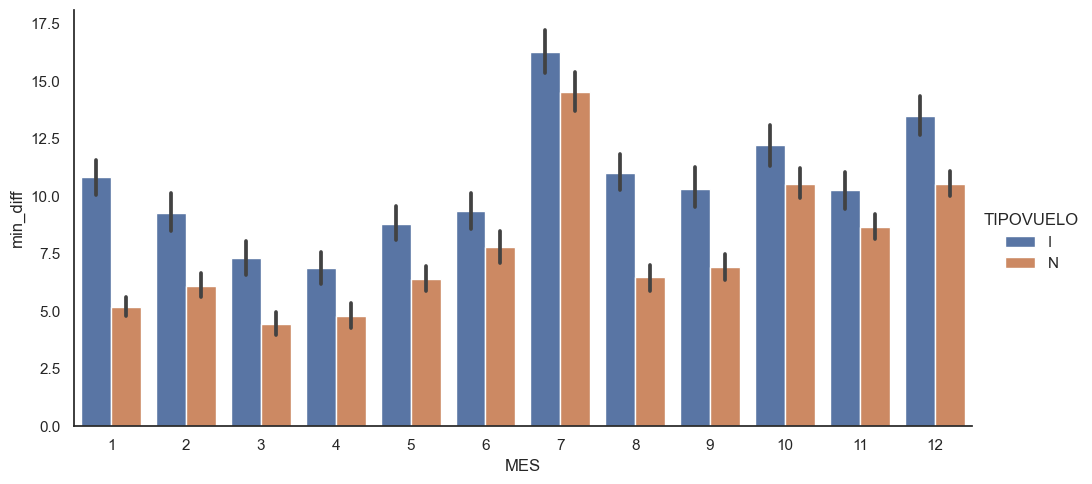

In [30]:
# I want to see the distribution and correlation between them.

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.catplot(x='MES', y='min_diff', kind = 'bar', hue='TIPOVUELO', data=df, height=5, aspect=2) 

plt.show()

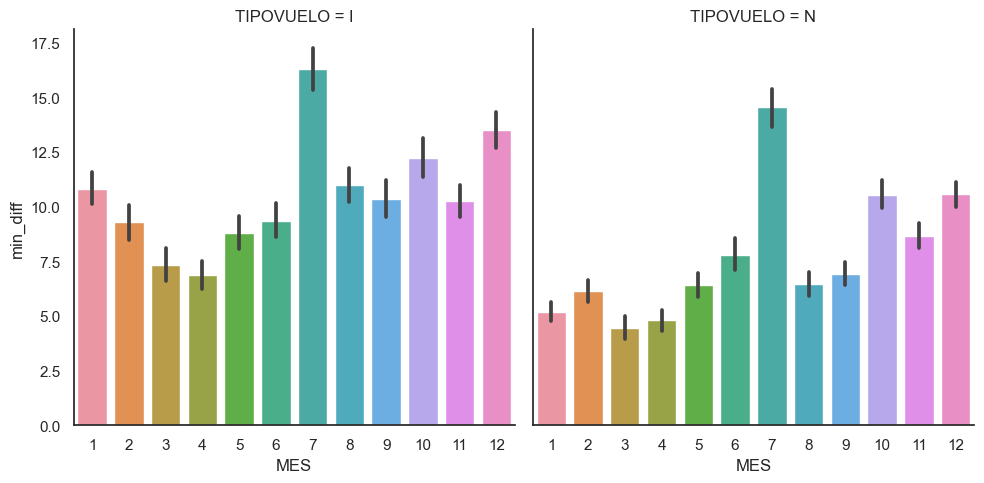

In [31]:
# I want to see the distribution and correlation between them.

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.catplot(x='MES', y='min_diff', kind = 'bar', col='TIPOVUELO', data=df) 

plt.show()

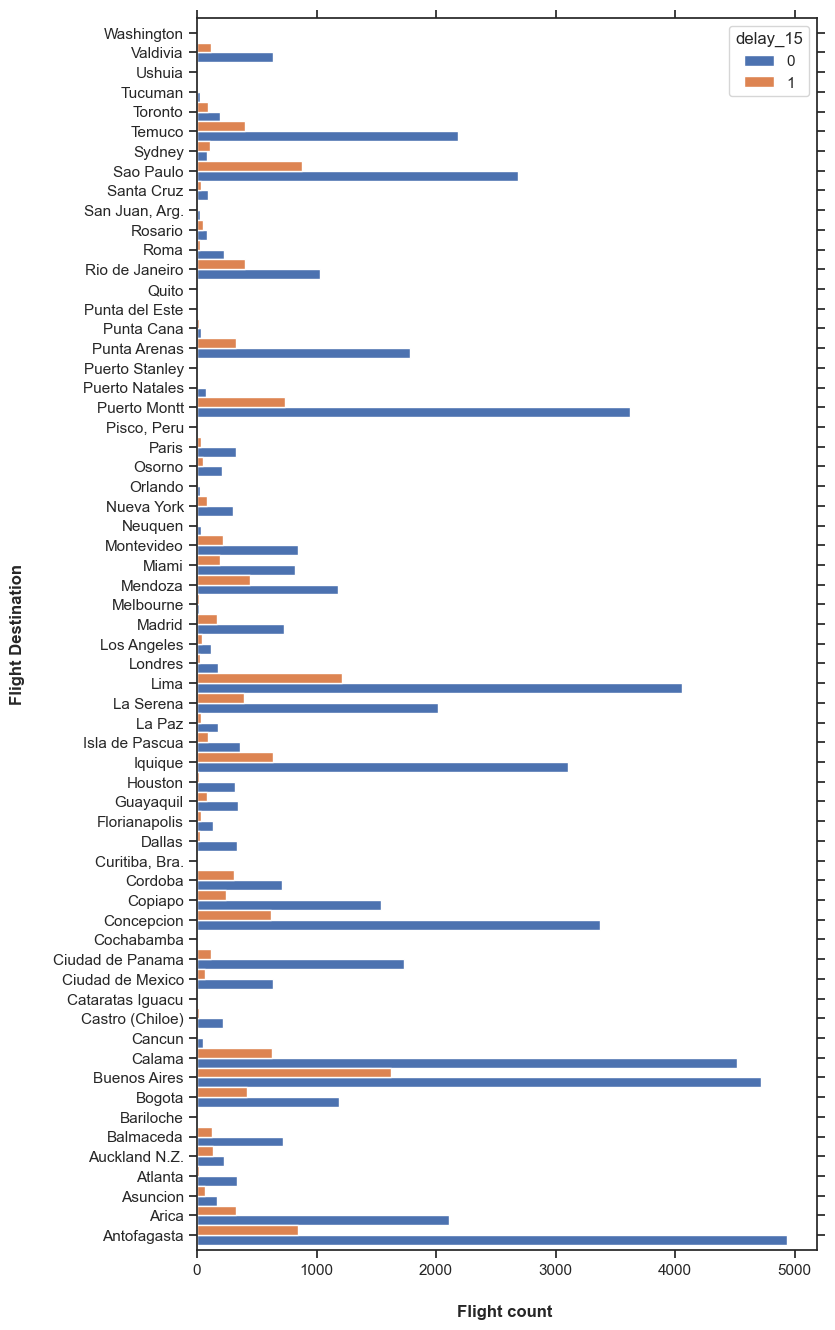

In [32]:
# Getting the distribution of the delay rate across destination (column SIGLADES)

ax = pd.crosstab(df.SIGLADES, df.delay_15).plot(kind="barh",stacked=False, figsize=(8, 16), zorder=2, width=1)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Set x-axis label
ax.set_xlabel("Flight count ", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Flight Destination", labelpad=20, weight='bold', size=12)

plt.show()


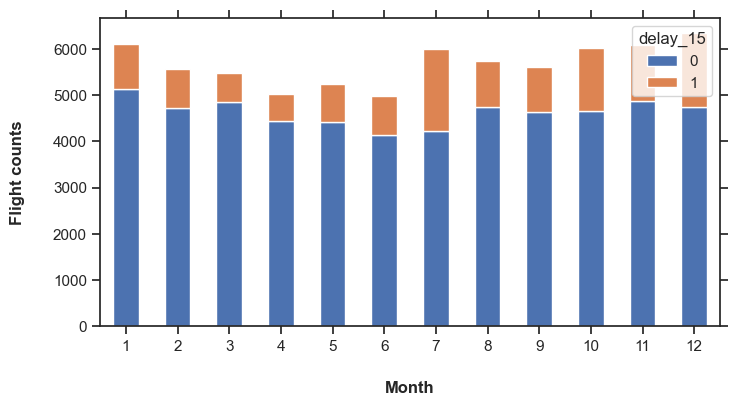

In [33]:
# Getting the distribution of the delay rate across day of the week (column DIANOM)

ax = pd.crosstab(df.MES, df.delay_15).plot(kind="bar",stacked=True, rot=0, figsize=(8, 4), zorder=2, width=0.5)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Set x-axis label
ax.set_xlabel("Month", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Flight counts", labelpad=20, weight='bold', size=12)

plt.show()

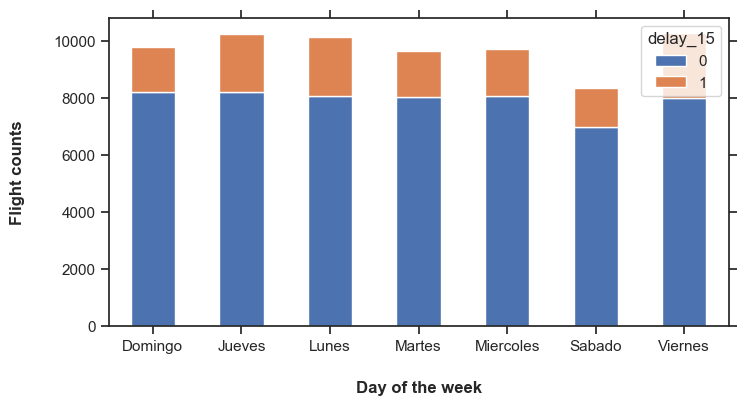

In [34]:
# Getting the distribution of the delay rate across day of the week (column DIANOM)

ax = pd.crosstab(df.DIANOM, df.delay_15).plot(kind="bar",stacked=True, rot=0, figsize=(8, 4), zorder=2, width=0.5)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Set x-axis label
ax.set_xlabel("Day of the week", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Flight counts", labelpad=20, weight='bold', size=12)

plt.show()

Text(0, 0.5, 'Flight counts')

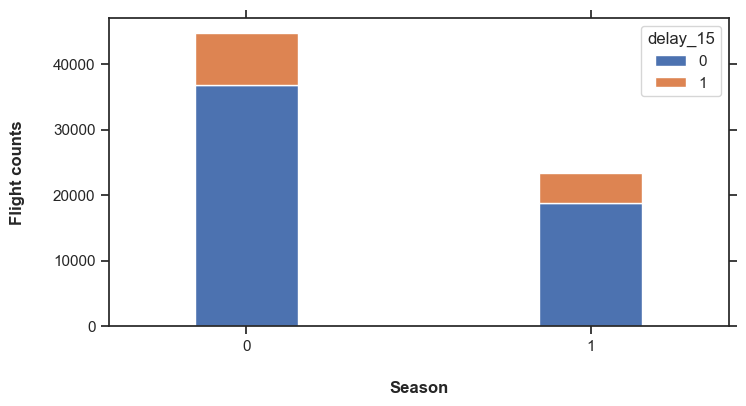

In [35]:
# Getting the distribution of the delay rate across season (column high_season)

ax = pd.crosstab(df.high_season, df.delay_15).plot(kind="bar",stacked=True, rot=0, figsize=(8, 4), zorder=2, width=0.3)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Set x-axis label
ax.set_xlabel("Season", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Flight counts", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Flight counts')

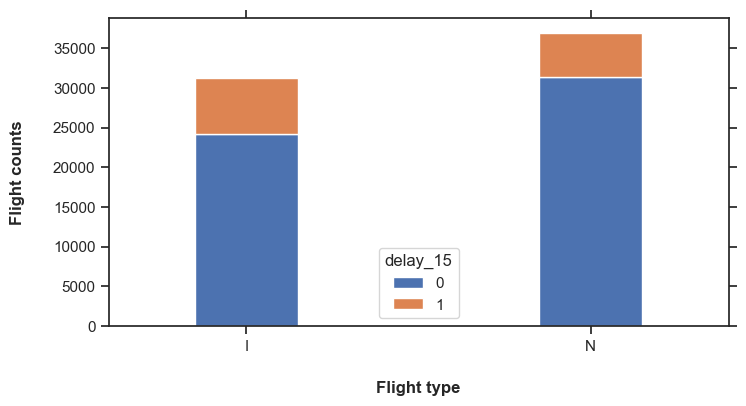

In [36]:
# Getting the distribution of the delay rate across type of flight (column TIPOVUELO)

ax = pd.crosstab(df.TIPOVUELO, df.delay_15).plot(kind="bar",stacked=True, rot=0, figsize=(8, 4), zorder=2, width=0.3)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Set x-axis label
ax.set_xlabel("Flight type", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Flight counts", labelpad=20, weight='bold', size=12)

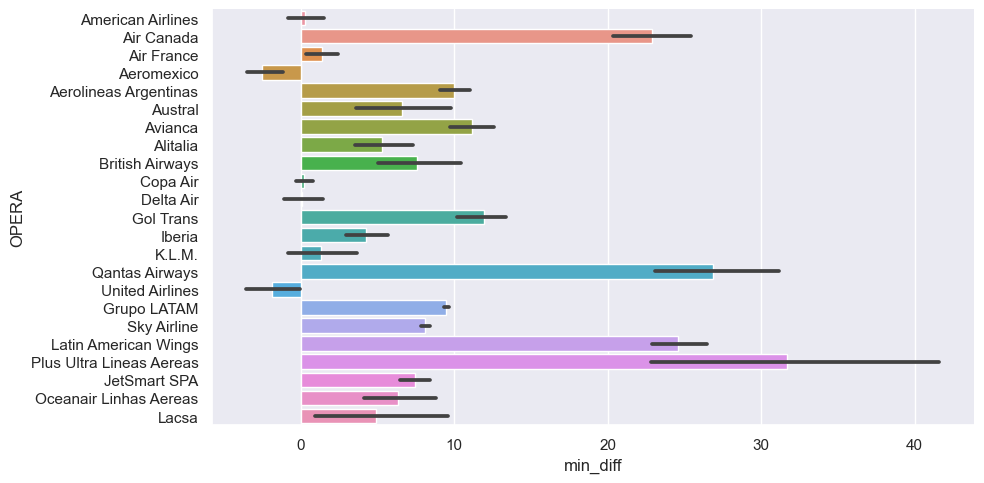

In [37]:
#set seaborn plotting aesthetics
sns.set(style='darkgrid')

#create grouped bar chart
sns.catplot(x='min_diff', y = 'OPERA', kind = 'bar', data=df, height=5, aspect=2) 

plt.show()


## Countplots

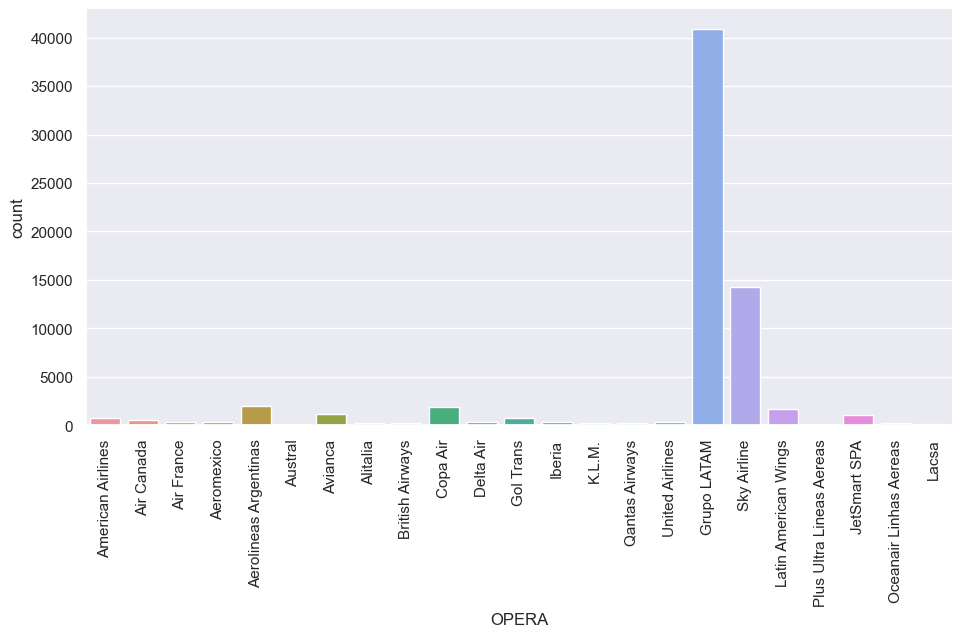

In [38]:
sns.catplot(x='OPERA', kind='count', data=df, height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

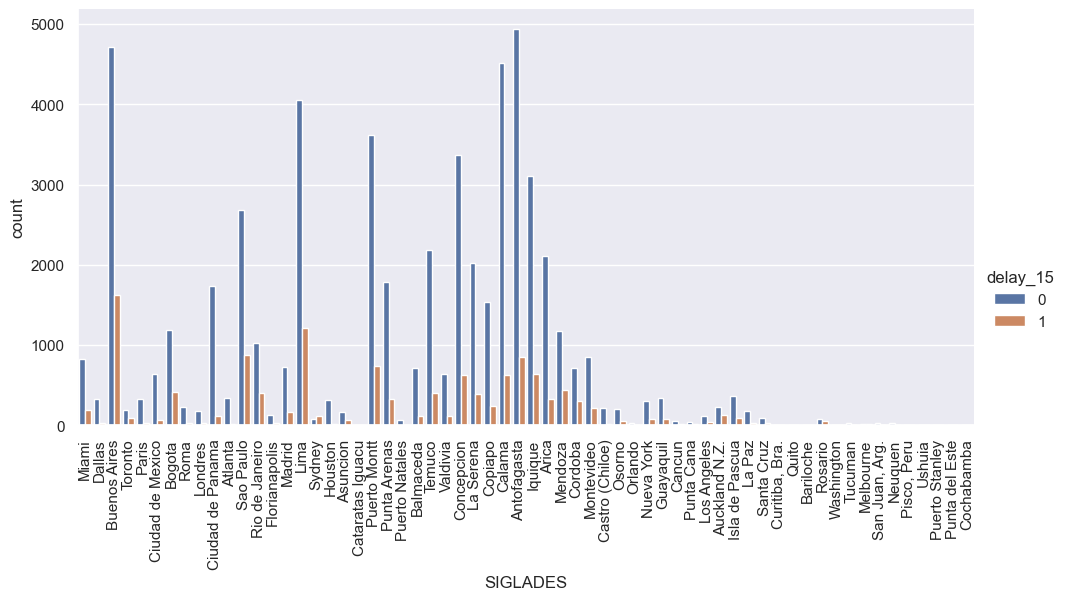

In [39]:
sns.catplot(x='SIGLADES', hue = 'delay_15', kind='count', data=df, height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

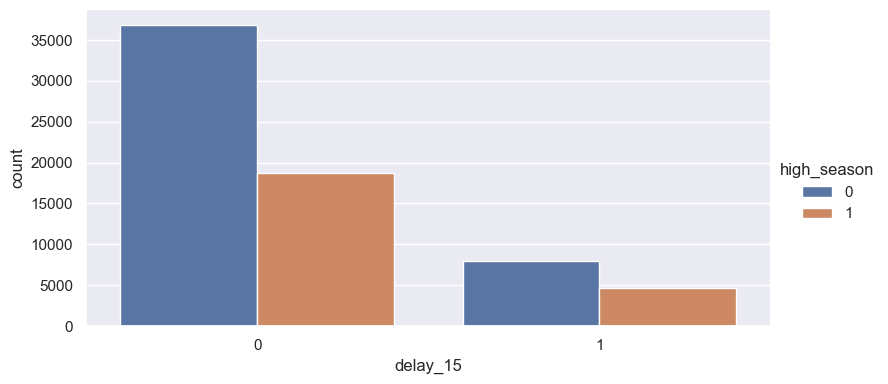

In [40]:
sns.catplot(x='delay_15', kind='count', hue = 'high_season', data=df, height=4, aspect=2)

plt.show()

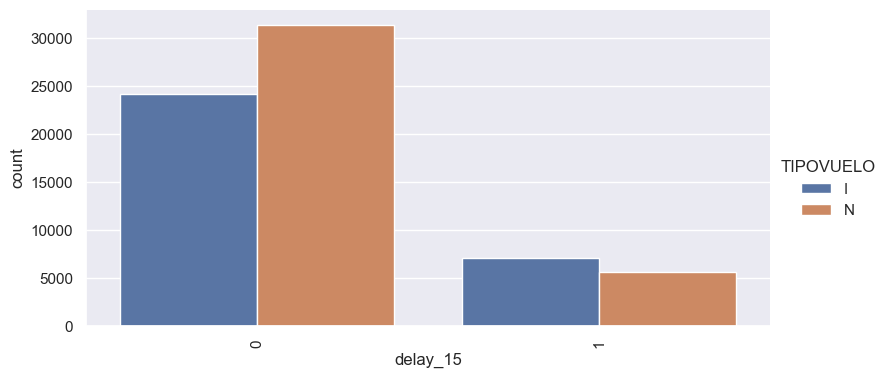

In [41]:
#ESTE NO SE SI AYUDA

sns.catplot(x='delay_15', kind='count', hue = 'TIPOVUELO', data=df, height=4, aspect=2)
plt.xticks(rotation=90)
plt.show()

## Pointplots

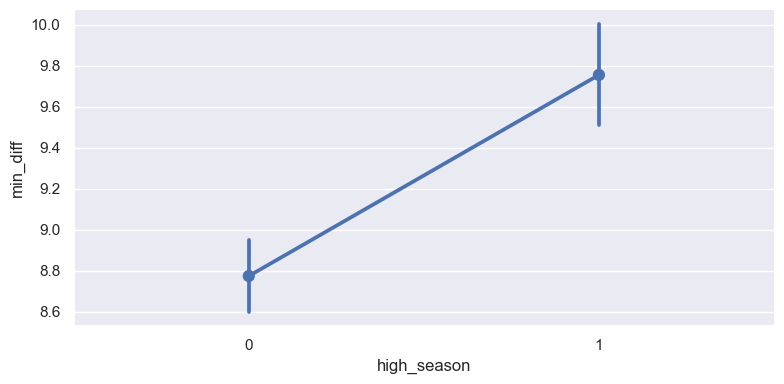

In [42]:
sns.catplot(x='high_season', y='min_diff', data=df, kind='point', height=4, aspect=2)
plt.show()

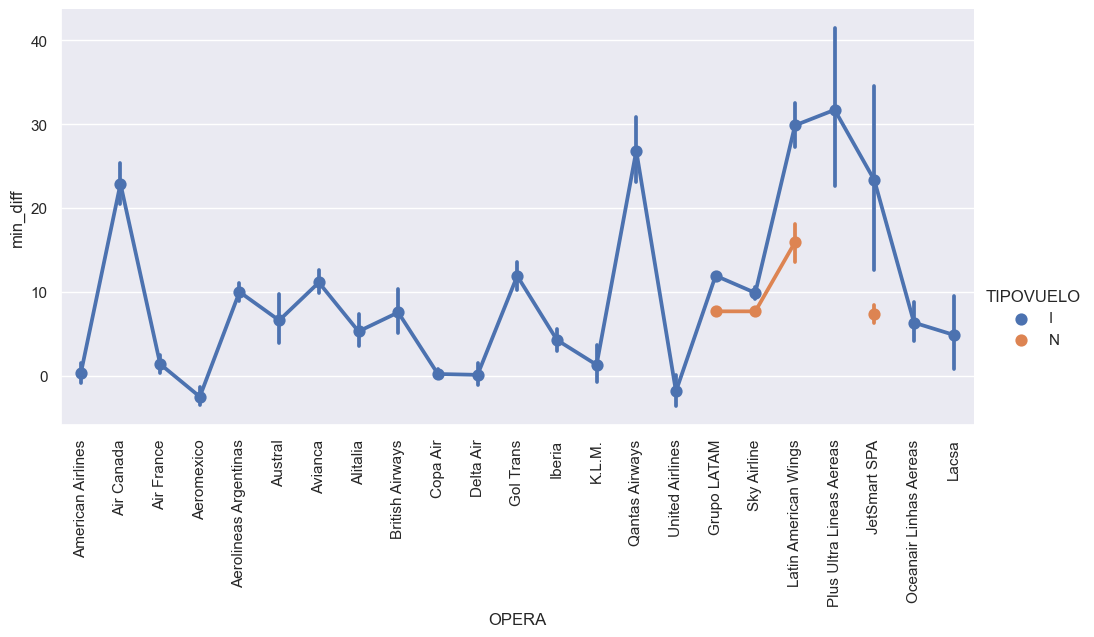

In [43]:
#ESTE Y EL SIGUIENTE ME GUSTARON MUCHO POR LOS INSIGHTS QUE MUESTRAN DIFERENTES A LOS OTROS, PERO OJO, AQUI NO MUESTRA LA RELACION DE CANTIDAD ENTRE VUELOS NAC E INTER

sns.catplot(x='OPERA', y='min_diff', data=df, hue='TIPOVUELO', kind='point', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

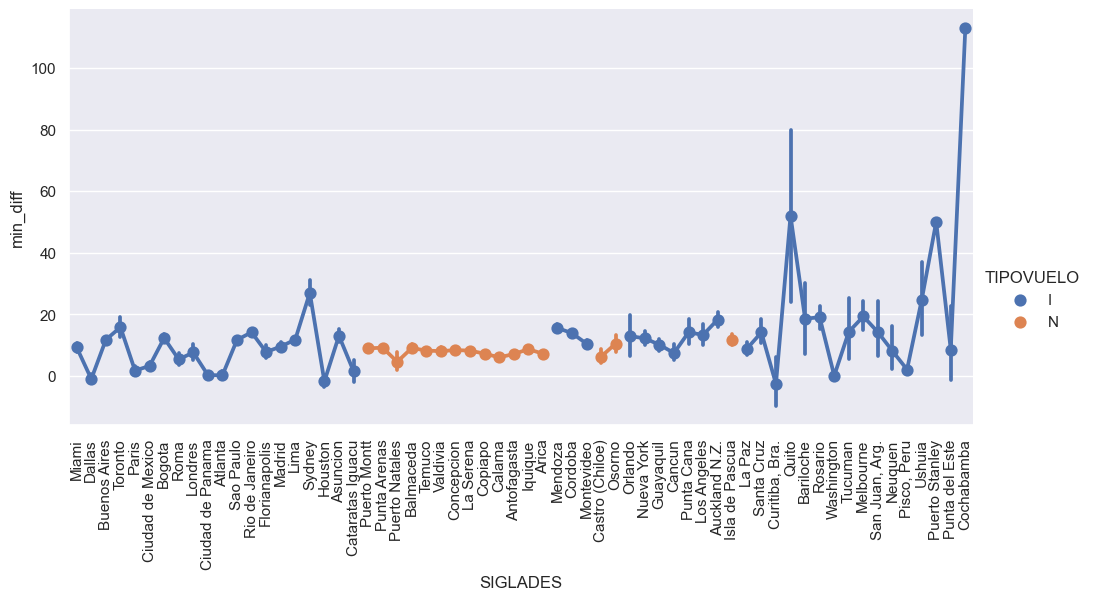

In [44]:
sns.catplot(x='SIGLADES', y='min_diff', hue = 'TIPOVUELO', data=df, kind='point', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

## Boxplot

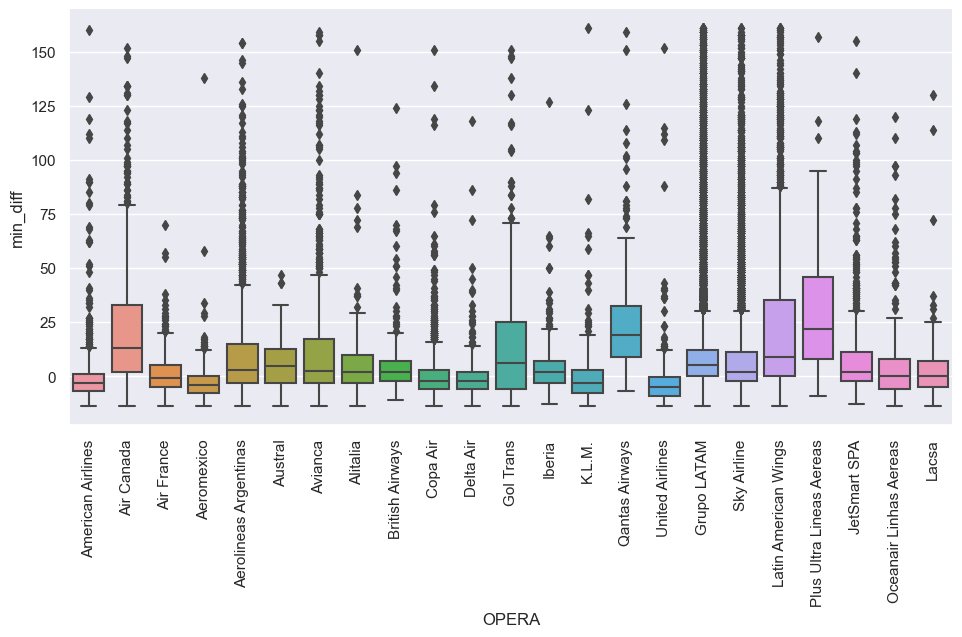

In [45]:
#Add interpretation later

sns.catplot(x='OPERA', y='min_diff', data=df, kind='box', height=5, aspect=2)
sns.set_style('whitegrid')
plt.xticks(rotation=90)

plt.show()

In [46]:
#Preguntas: Hay alguna correlacion entre aerolineas respecto a los atrasos? o correlacion respecto a los destinos, u horarios?
#What is the relationship between the delay and the destination, day or time? 
#what is the porcentage of delay of each airline?
#is there a pattern between the ones with higher percentages of delay?

# Applying Logistic Regression

### Checklist & Workflow to follow:       
- split the dataset in training and testing sets
- preprocessing: fill the missing value in Vlo-O, transforming datetime into numerical data type, dropping columns, encoding dummy variables
- fit the logistic regression model on the encoded training data.
- use the fitted encoder/dummy variables from training set to transform the test set.
- evaluate the logistic regression model performance on the encoded test set.
- work with hyperparameters


### 1) Splitting the dataset into training and testing sets:

In [47]:
X = df.drop('delay_15', axis=1).values
y = df['delay_15'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2) Preprocessing: Dropping programmed origin city and flight code columns and one-value columns, imputing missing value, treating datetime data, encoding dummy variables.

In [48]:
#Transforming the training set into a pandas data frame and adding the original name to the columns.

X_train_df = pd.DataFrame(data = X_train, columns = ['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O', 'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'high_season', 'min_diff', 'period_day'])
X_train_df.head()


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,period_day
0,2017-01-27 13:35:00,261,SCEL,SCTE,LAN,2017-01-27 13:36:00,261,SCEL,SCTE,LXP,...,1,2017,Viernes,N,Grupo LATAM,Santiago,Puerto Montt,1,1.0,Afternoon
1,2017-12-28 13:00:00,507,SCEL,SAEZ,SKU,2017-12-28 13:22:00,507.0,SCEL,SAEZ,SKU,...,12,2017,Jueves,I,Sky Airline,Santiago,Buenos Aires,1,22.0,Afternoon
2,2017-03-19 20:20:00,328,SCEL,SCFA,LAN,2017-03-19 20:38:00,328,SCEL,SCFA,LXP,...,3,2017,Domingo,N,Grupo LATAM,Santiago,Antofagasta,0,18.0,Night
3,2017-05-25 08:00:00,430,SCEL,SAME,LAN,2017-05-25 08:25:00,430,SCEL,SAME,LAN,...,5,2017,Jueves,I,Grupo LATAM,Santiago,Mendoza,0,25.0,Morning
4,2017-02-14 01:50:00,380,SCEL,SCAR,LAN,2017-02-14 01:54:00,380,SCEL,SCAR,LXP,...,2,2017,Martes,N,Grupo LATAM,Santiago,Arica,1,4.0,Night


Now I'll drop the columns from X_train that only have one value, and columns I won't use for modeling because they aren't relevant to identify patterns in the operational conditions and curcumstances of each flight. The columns I am evaluating to drop are: Vlo-I, Emp-I, Ori-O, Emp-O, and SIGLAORI.  

In [49]:
#Checking columns Emp-I and Emp-O  to decide if I will drop them. These columns show a code for the airline that operates the flight, and although most of the time it is the same code, there are sometimes that is not. So here I am checking how often the airline code changes between the scheduled and the operation. I want to see if they are enough to keep them:
X_train_df[(X_train_df['Emp-I'] == 'LAN') & (X_train_df['Emp-O'] == 'DSM')]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,period_day
77,2017-12-21 11:15:00,7811,SCEL,SAEZ,LAN,2017-12-21 11:58:00,7811.0,SCEL,SAEZ,DSM,...,12,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,1,43.0,Morning
181,2017-01-26 13:40:00,4503,SCEL,SABE,LAN,2017-01-26 13:46:00,4503,SCEL,SABE,DSM,...,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,1,6.0,Afternoon
211,2017-12-30 20:05:00,7813,SCEL,SABE,LAN,2017-12-30 20:03:00,7813.0,SCEL,SABE,DSM,...,12,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires,1,-2.0,Night
214,2017-09-16 08:55:00,7811,SCEL,SABE,LAN,2017-09-16 08:59:00,7811,SCEL,SABE,DSM,...,9,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires,1,4.0,Morning
263,2017-11-04 20:05:00,7813,SCEL,SABE,LAN,2017-11-04 20:13:00,7813,SCEL,SABE,DSM,...,11,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires,0,8.0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47224,2017-10-07 11:20:00,7811,SCEL,SABE,LAN,2017-10-07 11:29:00,7811,SCEL,SABE,DSM,...,10,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires,0,9.0,Morning
47258,2017-12-14 20:05:00,7813,SCEL,SABE,LAN,2017-12-14 20:13:00,7813.0,SCEL,SABE,DSM,...,12,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,1,8.0,Night
47305,2017-07-11 07:55:00,7811,SCEL,SABE,LAN,2017-07-11 09:23:00,7811,SCEL,SABE,DSM,...,7,2017,Martes,I,Grupo LATAM,Santiago,Buenos Aires,0,88.0,Morning
47409,2017-11-18 20:05:00,7813,SCEL,SABE,LAN,2017-11-18 20:00:00,7813,SCEL,SABE,DSM,...,11,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires,0,-5.0,Night


In [50]:
subset_for_testing = X_train_df[X_train_df['Emp-I'] == 'LAN']

In [51]:
print(subset_for_testing)

                  Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O  \
0     2017-01-27 13:35:00   261  SCEL  SCTE   LAN 2017-01-27 13:36:00   261   
2     2017-03-19 20:20:00   328  SCEL  SCFA   LAN 2017-03-19 20:38:00   328   
3     2017-05-25 08:00:00   430  SCEL  SAME   LAN 2017-05-25 08:25:00   430   
4     2017-02-14 01:50:00   380  SCEL  SCAR   LAN 2017-02-14 01:54:00   380   
7     2017-11-19 01:25:00   572  SCEL  SKBO   LAN 2017-11-19 01:27:00   572   
...                   ...   ...   ...   ...   ...                 ...   ...   
47736 2017-03-19 17:00:00   461  SCEL  SABE   LAN 2017-03-19 17:19:00   461   
47737 2017-11-17 07:25:00   439  SCEL  SABE   LAN 2017-11-17 07:30:00   439   
47739 2017-07-29 17:50:00   461  SCEL  SABE   LAN 2017-07-29 18:22:00   461   
47741 2017-10-26 12:50:00   752  SCEL  SBGR   LAN 2017-10-26 14:05:00   752   
47743 2017-03-30 22:05:00   388  SCEL  SCAR   LAN 2017-03-30 22:13:00   388   

      Ori-O Des-O Emp-O  ... MES   AÑO   DIANOM TIP

In [52]:
subset_for_testing[subset_for_testing['min_diff'] > 15]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,high_season,min_diff,period_day
2,2017-03-19 20:20:00,328,SCEL,SCFA,LAN,2017-03-19 20:38:00,328,SCEL,SCFA,LXP,...,3,2017,Domingo,N,Grupo LATAM,Santiago,Antofagasta,0,18.0,Night
3,2017-05-25 08:00:00,430,SCEL,SAME,LAN,2017-05-25 08:25:00,430,SCEL,SAME,LAN,...,5,2017,Jueves,I,Grupo LATAM,Santiago,Mendoza,0,25.0,Morning
17,2017-08-30 23:20:00,506,SCEL,KMCO,LAN,2017-08-30 23:38:00,506,SCEL,KMCO,LAN,...,8,2017,Miercoles,I,Grupo LATAM,Santiago,Orlando,0,18.0,Night
21,2017-01-11 23:55:00,481,SCEL,SAEZ,LAN,2017-01-12 00:17:00,481,SCEL,SAEZ,LAN,...,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,1,22.0,Night
24,2017-05-28 19:15:00,308,SCEL,SCSE,LAN,2017-05-28 19:47:00,308,SCEL,SCSE,LXP,...,5,2017,Domingo,N,Grupo LATAM,Santiago,La Serena,0,32.0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47716,2017-12-19 09:05:00,536,SCEL,SPJC,LAN,2017-12-19 10:23:00,536.0,SCEL,SPJC,LAN,...,12,2017,Martes,I,Grupo LATAM,Santiago,Lima,1,78.0,Morning
47719,2017-07-07 19:20:00,219,SCEL,SCIE,LAN,2017-07-07 20:21:00,219,SCEL,SCIE,LXP,...,7,2017,Viernes,N,Grupo LATAM,Santiago,Concepcion,0,61.0,Night
47736,2017-03-19 17:00:00,461,SCEL,SABE,LAN,2017-03-19 17:19:00,461,SCEL,SABE,LAN,...,3,2017,Domingo,I,Grupo LATAM,Santiago,Buenos Aires,0,19.0,Afternoon
47739,2017-07-29 17:50:00,461,SCEL,SABE,LAN,2017-07-29 18:22:00,461,SCEL,SABE,LAN,...,7,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires,1,32.0,Afternoon


In [53]:
subset_for_testing['Emp-O'].value_counts(normalize = True)

LAN    0.556765
LXP    0.387935
LPE    0.032731
DSM    0.012864
LNE    0.009705
Name: Emp-O, dtype: float64

What I did here was exploring the differences between these two columns Emp-I and Emp-O regarding LAN airline, to evaluate dropping one of them, as they both contain airline codes for each flight. I noticed that although this subset it is very small, it is a 10% of my training set, so I don't want to take any datapoint from it that could be part of a pattern of delay, that is my target feature. So I won't drop them after all.

In [54]:
# Now dropping the columns with one category, because I am keeping the other ones:
X_train_df.nunique()

Fecha-I        40002
Vlo-I            713
Ori-I              1
Des-I             62
Emp-I             30
Fecha-O        45011
Vlo-O            824
Ori-O              1
Des-O             63
Emp-O             32
DIA               31
MES               12
AÑO                2
DIANOM             7
TIPOVUELO          2
OPERA             23
SIGLAORI           1
SIGLADES          62
high_season        2
min_diff         176
period_day         3
dtype: int64

In [55]:
X_train_df.drop(columns=['Ori-I', 'Ori-O', 'SIGLAORI'], axis = 1, inplace=True) 

X_train_df.head()


,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,period_day
0,2017-01-27 13:35:00,261,SCTE,LAN,2017-01-27 13:36:00,261,SCTE,LXP,27,1,2017,Viernes,N,Grupo LATAM,Puerto Montt,1,1.0,Afternoon
1,2017-12-28 13:00:00,507,SAEZ,SKU,2017-12-28 13:22:00,507.0,SAEZ,SKU,28,12,2017,Jueves,I,Sky Airline,Buenos Aires,1,22.0,Afternoon
2,2017-03-19 20:20:00,328,SCFA,LAN,2017-03-19 20:38:00,328,SCFA,LXP,19,3,2017,Domingo,N,Grupo LATAM,Antofagasta,0,18.0,Night
3,2017-05-25 08:00:00,430,SAME,LAN,2017-05-25 08:25:00,430,SAME,LAN,25,5,2017,Jueves,I,Grupo LATAM,Mendoza,0,25.0,Morning
4,2017-02-14 01:50:00,380,SCAR,LAN,2017-02-14 01:54:00,380,SCAR,LXP,14,2,2017,Martes,N,Grupo LATAM,Arica,1,4.0,Night


In [56]:
#Now filling the missing value:
X_train_df.isnull().sum()

Fecha-I        0
Vlo-I          0
Des-I          0
Emp-I          0
Fecha-O        0
Vlo-O          1
Des-O          0
Emp-O          0
DIA            0
MES            0
AÑO            0
DIANOM         0
TIPOVUELO      0
OPERA          0
SIGLADES       0
high_season    0
min_diff       0
period_day     0
dtype: int64

In [57]:
#Finding the missing value in Vlo-O, and filling it:
X_train_df.loc[X_train_df.isnull().any(axis=1)] 

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,period_day
17502,2017-01-19 11:00:00,200,SPJC,LAW,2017-01-19 11:03:00,NaN,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Lima,1,3.0,Morning


The data in column Vlo-I is related to the data in column Vlo-O, both about the flight number so it related to the airline. In this row, the airline and destination city are in columns OPERA and SIGLADES, so I will check if everytime that the airline Latin American Wings flies to Lima, the flight number is 200. This way I can use it to fill the missing data on Vlo-O.

In [58]:
subset = X_train_df[(X_train_df['SIGLADES'] == 'Lima') & (X_train_df['OPERA'] == 'Latin American Wings')]

In [59]:
subset_df = pd.DataFrame(subset)

In [60]:
print(subset_df)

                  Fecha-I Vlo-I Des-I Emp-I             Fecha-O Vlo-O Des-O  \
30    2017-03-24 11:00:00   200  SPJC   LAW 2017-03-24 10:51:00   200  SPJC   
39    2017-10-11 02:45:00   202  SPJC   LAW 2017-10-11 02:39:00   202  SPJC   
193   2017-02-11 01:15:00   700  SPJC   LAW 2017-02-11 03:08:00   700  SPJC   
274   2017-06-25 14:00:00   202  SPJC   LAW 2017-06-25 14:08:00   202  SPJC   
397   2017-09-04 02:45:00   202  SPJC   LAW 2017-09-04 03:37:00   202  SPJC   
...                   ...   ...   ...   ...                 ...   ...   ...   
47320 2017-06-19 11:00:00   200  SPJC   LAW 2017-06-19 11:52:00   200  SPJC   
47369 2017-05-26 11:00:00   200  SPJC   LAW 2017-05-26 11:58:00   200  SPJC   
47374 2017-07-29 06:00:00   600  SPJC   LAW 2017-07-29 05:57:00   600  SPJC   
47402 2017-08-03 11:00:00   200  SPJC   LAW 2017-08-03 11:17:00   200  SPJC   
47484 2017-01-23 01:15:00   704  SPJC   LAW 2017-01-23 01:21:00   704  SPJC   

      Emp-O DIA MES   AÑO     DIANOM TIPOVUELO     

In [61]:
subset_df[(subset_df['Vlo-I'] == 200) & (subset_df['Vlo-O'] == 200)]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,period_day
12335,2017-12-12 12:00:00,200,SPJC,LAW,2017-12-12 12:36:00,200.0,SPJC,JMR,12,12,2017,Martes,I,Latin American Wings,Lima,1,36.0,Afternoon
14233,2017-12-26 12:00:00,200,SPJC,LAW,2017-12-26 12:04:00,200.0,SPJC,JMR,26,12,2017,Martes,I,Latin American Wings,Lima,1,4.0,Afternoon
18520,2017-12-18 12:00:00,200,SPJC,LAW,2017-12-18 13:34:00,200.0,SPJC,JMR,18,12,2017,Lunes,I,Latin American Wings,Lima,1,94.0,Afternoon
19204,2017-12-28 12:00:00,200,SPJC,LAW,2017-12-28 12:10:00,200.0,SPJC,JMR,28,12,2017,Jueves,I,Latin American Wings,Lima,1,10.0,Afternoon
24963,2017-12-22 12:00:00,200,SPJC,LAW,2017-12-22 13:26:00,200.0,SPJC,JMR,22,12,2017,Viernes,I,Latin American Wings,Lima,1,86.0,Afternoon
26144,2017-12-25 12:00:00,200,SPJC,LAW,2017-12-25 12:08:00,200.0,SPJC,JMR,25,12,2017,Lunes,I,Latin American Wings,Lima,1,8.0,Afternoon
27321,2017-12-21 12:00:00,200,SPJC,LAW,2017-12-21 12:13:00,200.0,SPJC,JMR,21,12,2017,Jueves,I,Latin American Wings,Lima,1,13.0,Afternoon
28415,2017-12-01 12:00:00,200,SPJC,LAW,2017-12-01 12:34:00,200.0,SPJC,JMR,1,12,2017,Viernes,I,Latin American Wings,Lima,0,34.0,Afternoon
29315,2017-12-06 12:00:00,200,SPJC,LAW,2017-12-06 12:28:00,200.0,SPJC,JMR,6,12,2017,Miercoles,I,Latin American Wings,Lima,0,28.0,Afternoon
35555,2017-12-11 12:00:00,200,SPJC,LAW,2017-12-11 12:23:00,200.0,SPJC,JMR,11,12,2017,Lunes,I,Latin American Wings,Lima,0,23.0,Afternoon


In [62]:
subset_df[(subset_df['Vlo-I'] != 200) & (subset_df['Vlo-O'] == 200)]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,period_day


In [63]:
subset_df[(subset_df['Vlo-I'] == 200) & (subset_df['Vlo-O'] != 200)]

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,period_day


After exploring the dataset I can see that when Latin American Wings is flying to Lima, the flight number in column 1 (Vlo-I) is always the same as in column 6 (Vlo-O), so I will fill the missing value with the same datapoint in 1 for that row.

In [64]:
X_train_df.loc[17502, 'Vlo-O'] = '200'

In [65]:
#Checking if it's done:

X_train_df.isnull().sum()

Fecha-I        0
Vlo-I          0
Des-I          0
Emp-I          0
Fecha-O        0
Vlo-O          0
Des-O          0
Emp-O          0
DIA            0
MES            0
AÑO            0
DIANOM         0
TIPOVUELO      0
OPERA          0
SIGLADES       0
high_season    0
min_diff       0
period_day     0
dtype: int64

Next task is to transform the datetime data types into int64:

In [66]:
# Treating datetime data to transform them in numeric data:
X_train_df.dtypes


Fecha-I        datetime64[ns]
Vlo-I                  object
Des-I                  object
Emp-I                  object
Fecha-O        datetime64[ns]
Vlo-O                  object
Des-O                  object
Emp-O                  object
DIA                    object
MES                    object
AÑO                    object
DIANOM                 object
TIPOVUELO              object
OPERA                  object
SIGLADES               object
high_season            object
min_diff               object
period_day             object
dtype: object

The original dataset has columns for day, month and year already, but I want to be sure they are correct. So this is what I'll do:
- I will extract the date & time features from the datetime object in columns Fecha-I and Fecha-O, and create new columns.
- Once I have the extrated day, month and year, I will check that they are exactly the dame data that the original day, month and year columns have.
- If they are, I will drop them and keep only the extracted time features.

In [67]:
#Extracting date & time features of Fecha-I column:
X_train_df['scheduled_year'] = X_train_df['Fecha-I'].dt.year
X_train_df['scheduled_month'] = X_train_df['Fecha-I'].dt.month 
X_train_df['scheduled_day'] = X_train_df['Fecha-I'].dt.day
X_train_df['scheduled_hour'] = X_train_df['Fecha-I'].dt.hour
X_train_df['scheduled_minute'] = X_train_df['Fecha-I'].dt.minute
X_train_df['scheduled_second'] = X_train_df['Fecha-I'].dt.second

In [68]:
X_train_df.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,...,SIGLADES,high_season,min_diff,period_day,scheduled_year,scheduled_month,scheduled_day,scheduled_hour,scheduled_minute,scheduled_second
0,2017-01-27 13:35:00,261,SCTE,LAN,2017-01-27 13:36:00,261,SCTE,LXP,27,1,...,Puerto Montt,1,1.0,Afternoon,2017,1,27,13,35,0
1,2017-12-28 13:00:00,507,SAEZ,SKU,2017-12-28 13:22:00,507.0,SAEZ,SKU,28,12,...,Buenos Aires,1,22.0,Afternoon,2017,12,28,13,0,0
2,2017-03-19 20:20:00,328,SCFA,LAN,2017-03-19 20:38:00,328,SCFA,LXP,19,3,...,Antofagasta,0,18.0,Night,2017,3,19,20,20,0
3,2017-05-25 08:00:00,430,SAME,LAN,2017-05-25 08:25:00,430,SAME,LAN,25,5,...,Mendoza,0,25.0,Morning,2017,5,25,8,0,0
4,2017-02-14 01:50:00,380,SCAR,LAN,2017-02-14 01:54:00,380,SCAR,LXP,14,2,...,Arica,1,4.0,Night,2017,2,14,1,50,0


In [79]:
# Testing if the new columns and extracted data is redundant, checking value counts on each column:

X_train_df['AÑO'].value_counts(normalize = True)

2017    0.999958
2018    0.000042
Name: AÑO, dtype: float64

In [80]:
X_train_df['scheduled_year'].value_counts(normalize = True)

2017    1.0
Name: scheduled_year, dtype: float64

I will drop the scheduled_year column, and keep the AÑO column.

In [81]:
#Now checking redundancy of month column and extracted month column:

X_train_df['MES'].value_counts(normalize = True)

12    0.093436
1     0.090147
11    0.088828
10    0.087948
7     0.087069
9     0.083487
8     0.083424
2     0.082230
3     0.079759
5     0.077308
4     0.073789
6     0.072575
Name: MES, dtype: float64

In [82]:
X_train_df['scheduled_month'].value_counts(normalize = True)

12    0.093457
1     0.090127
11    0.088849
10    0.087948
7     0.087069
9     0.083487
8     0.083424
2     0.082230
3     0.079738
5     0.077287
4     0.073810
6     0.072575
Name: scheduled_month, dtype: float64

In [83]:
#Now testing the same for DIA and scheduled_day columns:
X_train_df['DIA'].value_counts(normalize = True)

3     0.034434
26    0.034224
16    0.034119
20    0.033952
6     0.033868
22    0.033533
12    0.033324
23    0.033156
27    0.033156
13    0.033093
24    0.033051
11    0.033051
10    0.032967
9     0.032947
1     0.032716
5     0.032695
2     0.032590
15    0.032590
19    0.032570
21    0.032423
7     0.032381
28    0.032339
17    0.032255
18    0.032151
8     0.032046
14    0.031941
4     0.031669
25    0.031564
29    0.030664
30    0.029386
31    0.019144
Name: DIA, dtype: float64

In [84]:
X_train_df['scheduled_day'].value_counts(normalize = True)

3     0.034413
26    0.034119
20    0.034078
16    0.034057
6     0.034036
22    0.033491
12    0.033365
24    0.033198
23    0.033198
13    0.033198
27    0.033177
10    0.033051
11    0.032967
9     0.032905
1     0.032737
15    0.032674
2     0.032611
5     0.032611
19    0.032528
28    0.032360
21    0.032360
17    0.032297
7     0.032234
18    0.032130
8     0.032067
14    0.031774
4     0.031711
25    0.031439
29    0.030684
30    0.029365
31    0.019165
Name: scheduled_day, dtype: float64

In [87]:
#Extracting date & time features of Fecha-O column:
X_train_df['operation_year'] = X_train_df['Fecha-O'].dt.year
X_train_df['operation_month'] = X_train_df['Fecha-O'].dt.month 
X_train_df['operation_day'] = X_train_df['Fecha-O'].dt.day
X_train_df['operation_hour'] = X_train_df['Fecha-O'].dt.hour
X_train_df['operation_minute'] = X_train_df['Fecha-O'].dt.minute
X_train_df['operation_second'] = X_train_df['Fecha-O'].dt.second

In [88]:
X_train_df.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,...,scheduled_day,scheduled_hour,scheduled_minute,scheduled_second,operation_year,operation_month,operation_day,operation_hour,operation_minute,operation_second
0,2017-01-27 13:35:00,261,SCTE,LAN,2017-01-27 13:36:00,261,SCTE,LXP,27,1,...,27,13,36,0,2017,1,27,13,36,0
1,2017-12-28 13:00:00,507,SAEZ,SKU,2017-12-28 13:22:00,507.0,SAEZ,SKU,28,12,...,28,13,22,0,2017,12,28,13,22,0
2,2017-03-19 20:20:00,328,SCFA,LAN,2017-03-19 20:38:00,328,SCFA,LXP,19,3,...,19,20,38,0,2017,3,19,20,38,0
3,2017-05-25 08:00:00,430,SAME,LAN,2017-05-25 08:25:00,430,SAME,LAN,25,5,...,25,8,25,0,2017,5,25,8,25,0
4,2017-02-14 01:50:00,380,SCAR,LAN,2017-02-14 01:54:00,380,SCAR,LXP,14,2,...,14,1,54,0,2017,2,14,1,54,0


In [89]:
X_train_df['operation_year'].value_counts(normalize = True)

2017    0.999958
2018    0.000042
Name: operation_year, dtype: float64

operation_year column is exactly the same as AÑO column, so I will keep the later and drop operation_year.

In [90]:
#Dropping Fecha-I, Fecha-O, scheduled_year, and operation_year columns:
X_train_df.drop(columns=['Fecha-I', 'Fecha-O', 'scheduled_year', 'operation_year'], inplace=True)

In [91]:
X_train_df.head()

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,...,scheduled_month,scheduled_day,scheduled_hour,scheduled_minute,scheduled_second,operation_month,operation_day,operation_hour,operation_minute,operation_second
0,261,SCTE,LAN,261,SCTE,LXP,27,1,2017,Viernes,...,1,27,13,36,0,1,27,13,36,0
1,507,SAEZ,SKU,507.0,SAEZ,SKU,28,12,2017,Jueves,...,12,28,13,22,0,12,28,13,22,0
2,328,SCFA,LAN,328,SCFA,LXP,19,3,2017,Domingo,...,3,19,20,38,0,3,19,20,38,0
3,430,SAME,LAN,430,SAME,LAN,25,5,2017,Jueves,...,5,25,8,25,0,5,25,8,25,0
4,380,SCAR,LAN,380,SCAR,LXP,14,2,2017,Martes,...,2,14,1,54,0,2,14,1,54,0


In [92]:
#Now I need to check the data type of all these columns and transform everything into int64: